In [4]:
print('hi my name is hemanth')

hi my name is hemanth


Converged at epoch 130


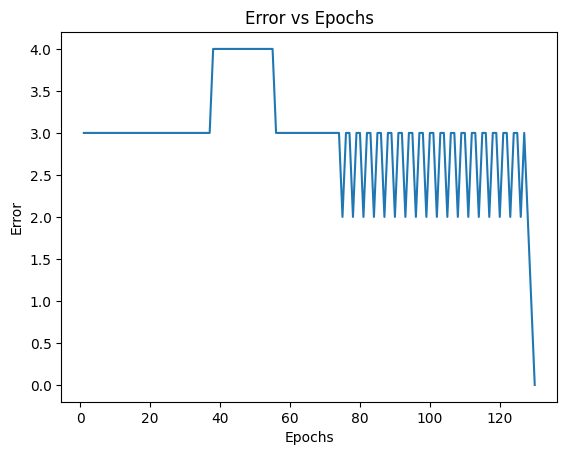

Final weights after convergence: [-0.1   0.1   0.05]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron function
def perceptron(input_data, weights):
    # Add bias
    input_with_bias = np.insert(input_data, 0, 1)
    # Calculate weighted sum
    weighted_sum = np.dot(input_with_bias, weights)
    # Apply activation function
    output = step_function(weighted_sum)
    return output

# AND gate data
data = np.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])

# Target labels
labels = np.array([0, 0, 0, 1])

# Initial weights
weights = np.array([10, 0.2, -0.75])

# Learning rate
learning_rate = 0.05

# Convergence error threshold
convergence_error = 0.002

# Maximum number of epochs
max_epochs = 1000

# Track error for plotting
errors = []

# Training the perceptron
for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(data)):
        prediction = perceptron(data[i], weights)
        error = labels[i] - prediction
        total_error += error ** 2
        # Update weights
        weights += learning_rate * error * np.insert(data[i], 0, 1)
    errors.append(total_error)
    # Check for convergence
    if total_error <= convergence_error:
        print("Converged at epoch", epoch + 1)
        break

# Plot epochs against error values
plt.plot(range(1, len(errors) + 1), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.show()

# Print the final weights
print("Final weights after convergence:", weights)


ReLU converged at epoch 390


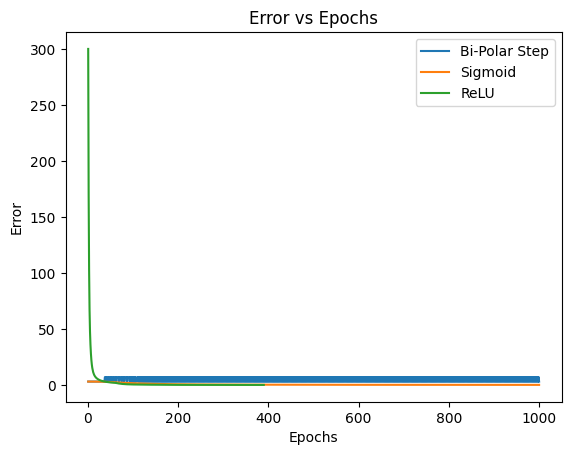

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Bi-Polar Step activation function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return max(0, x)

# Perceptron function with specified activation function
def perceptron(input_data, weights, activation_function):
    # Add bias
    input_with_bias = np.insert(input_data, 0, 1)
    # Calculate weighted sum
    weighted_sum = np.dot(input_with_bias, weights)
    # Apply activation function
    output = activation_function(weighted_sum)
    return output

# AND gate data
data = np.array([[0, 0],
                 [0, 1],
                 [1, 0],
                 [1, 1]])

# Target labels
labels = np.array([0, 0, 0, 1])

# Initial weights
weights = np.array([10, 0.2, -0.75])

# Learning rate
learning_rate = 0.05

# Convergence error threshold
convergence_error = 0.002

# Maximum number of epochs
max_epochs = 1000

# List to store number of iterations for each activation function
iterations_needed = []

# Activation functions to test
activation_functions = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid,
    "ReLU": relu
}

for activation_name, activation_function in activation_functions.items():
    # Reset weights for each activation function
    weights = np.array([10, 0.2, -0.75])
    # Reset error list for plotting
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            prediction = perceptron(data[i], weights, activation_function)
            error = labels[i] - prediction
            total_error += error ** 2
            # Update weights
            weights += learning_rate * error * np.insert(data[i], 0, 1)
        errors.append(total_error)
        # Check for convergence
        if total_error <= convergence_error:
            print(f"{activation_name} converged at epoch {epoch + 1}")
            iterations_needed.append(epoch + 1)
            break

    # Plot epochs against error values for each activation function
    plt.plot(range(1, len(errors) + 1), errors, label=activation_name)

# Plot settings
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.legend()
plt.show()

# Print iterations needed for convergence for each activation function
for i, activation_name in enumerate(activation_functions.keys()):
 print(f"Iterations needed for {activation_name}: {iterations_needed[i]}")
